# **MACHINE LEARNING FOR TIME SERIES DATA IN PYTHON**
Professor Justin Bois

## Time Series and Machine Learning Primer 

### Timeseries kinds and applications 

Time Series (data that changes over time)

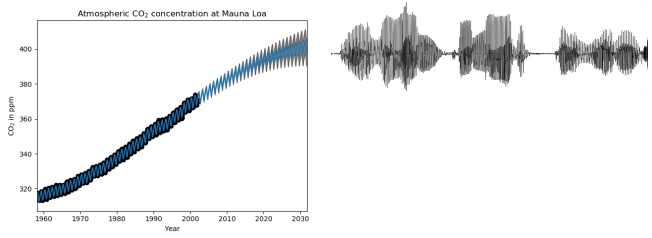

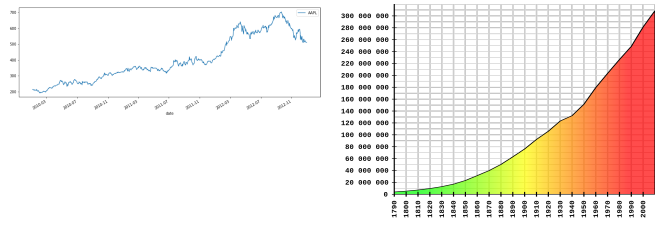

What makes a time series?
- array of numbers of the data itself
- another array with timestamp

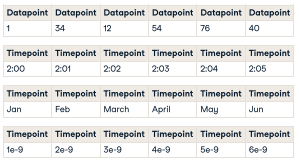

Reading in a time series with Pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')
data.head()

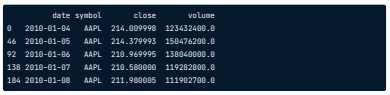

Plotting a pandas timeseries

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
data.plot('date','close', ax=ax)
ax.set(title="AAPL daily closing price")

A timeseries plot

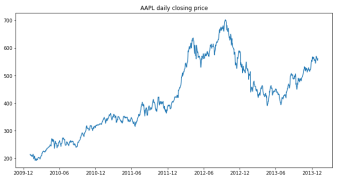

Why machine learning?
- We can use really big data and really complicated data

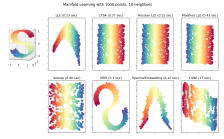

Why machine learning?
- We can...
- Predict the future
- Automate this process

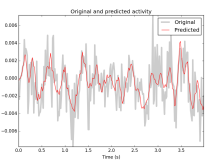

Why combine these two?

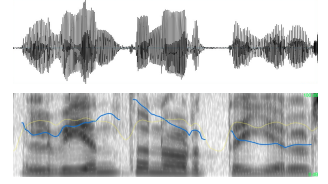

A machine learning pipeline
- Feature extraction
- Model fitting
- Prediction and validation

In [ ]:
#Example
# Print the first 5 rows of data2
print(data2.head())

# Print the first 5 rows of data2
print(data2.head())

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

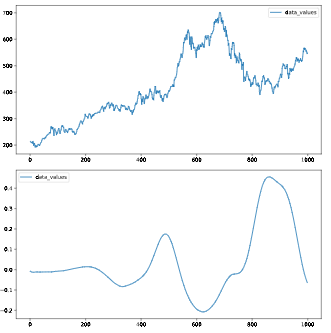

In [ ]:
#Example
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

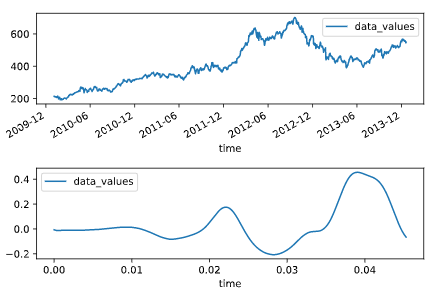

### Machine learning basics 

Always begin by looking at your data

In [ ]:
array.shape
#output: (10,5)

In [ ]:
array[:3] #print first few rows

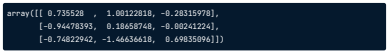

In [ ]:
df.head()

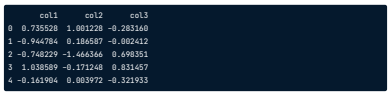

Always visualize your data
- Make sure it looks the way you'd expect

In [ ]:
# Using matplotlib
fig, ax = plt.subplots()
ax.plot(...)

# Using pandas
fig, ax = plt.subplots()
df.plot(..., ax=ax)

Scikit-learn
- Scikit-learn is the most popular machine learning library in Python
- https://scikit-learn.org/stable/

In [ ]:
from sklearn.svm import LinearSVC

Preparing data for scikit-learn
- scikit-learn expects a particular structure of data:
    - (samples, features)
- Make sure that your data is at least two-dimensional
- Make sure the rst dimension is samples

If your data is not shaped properly
- If the axes are swapped:

In [ ]:
array.T.shape #common approach to swap axis
#output: (10, 3)

If your data is not shaped properly
- If we're missing an axis, use .reshape() :

In [ ]:
array.shape
(10,)

array.reshape([-1, 1]).shape
(10, 1)

- -1 will automatically fill that axis with remaining values

Fitting a model with scikit-learn

In [ ]:
# Import a support vector classifier
from sklearn.svm import LinearSVC

# Instantiate this model
model = LinearSVC()

# Fit the model on some data
model.fit(X, y)

It is common for y to be of shape (samples, 1)

Investigating the model

In [ ]:
# There is one coefficient per input feature
model.coef_
#output: array([[ 0.69417875,-0.5289162 ]])

Predicting with a fit model

In [ ]:
# Generate predictions
predictions = model.predict(X_test)

In [ ]:
#Example
# Print the first 5 rows for inspection
print(data.head())

from sklearn.svm import LinearSVC

# Construct data for the model
X = data[["petal length (cm)", "petal width (cm)"]]
y = data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

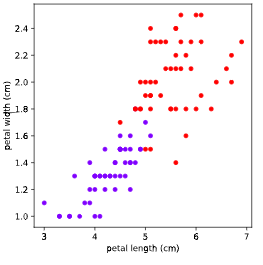

In [ ]:
#Example
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

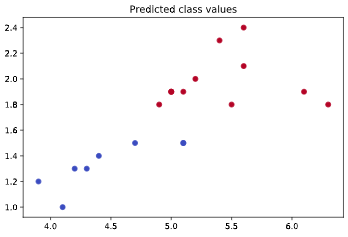

In [ ]:
#Example
from sklearn import linear_model

# Prepare input and output DataFrames
X = boston[["AGE"]]
y = boston[["RM"]]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)

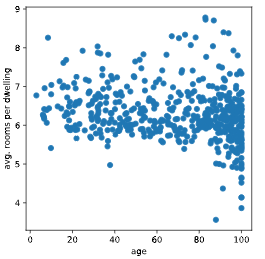

In [ ]:
#Example
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1,1))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

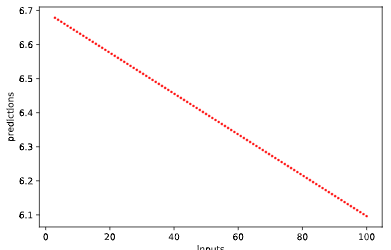

### Machine learning and time series data 

Getting to know our data
- The datasets that we'll use in this course are all freely-available online
- There are many datasets available to download on the web, the ones we'll use come from Kaggle

The Heartbeat Acoustic Data
- Many recordings of heart sounds from different patients
- Some had normally-functioning hearts, others had abnormalities
- Data comes in the form of audio files + labels for each file
- Can we find the "abnormal" heart beats?

Loading auditory data

In [ ]:
from glob import glob
files = glob('data/heartbeat-sounds/files/*.wav') #glob shows all files
print(files)

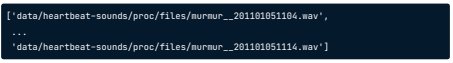

Reading in auditory data

In [ ]:
import librosa as lr #read audio dataset
# `load` accepts a path to an audio file
audio, sfreq = lr.load('data/heartbeat-sounds/proc/files/murmur__201101051104.wav')

print(sfreq)
#2205

In this case, the sampling frequency is 2205, meaning there are 2205 samples per second

Inferring time from samples
- If we know the sampling rate of a timeseries, then we know the timestamp of each datapoint relative to the first datapoint
- Note: this assumes the sampling rate is fixed and no data points are lost

Creating a time array (I)
- Create an array of indices, one for each sample, and divide by the sampling frequency

In [ ]:
indices = np.arange(0, len(audio))
time = indices / sfreq

Creating a time array (II)
- Find the time stamp for the N-1th data point. Then use linspace() to interpolate from zero to that time

In [ ]:
final_time = (len(audio) - 1) / sfreq
time = np.linspace(0, final_time, sfreq)

The New York Stock Exchange dataset
- This dataset consists of company stock values for 10 years
- Can we detect any patterns in historical records that allow us to predict the value of companies in the future?

Looking at the data

In [ ]:
data = pd.read_csv('path/to/data.csv')
data.columns

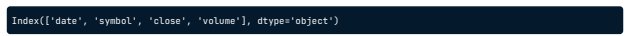

In [ ]:
data.head()

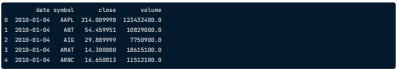

Timeseries with Pandas DataFrames
- We can investigate the object type of each column by accessing the dtypes attribute

In [ ]:
df['date'].dtypes

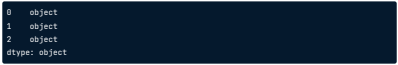

Converting a column to a time series
- To ensure that a column within a DataFrame is treated as time series, use the to_datetime() function

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date']

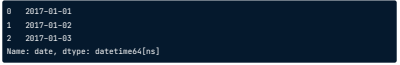

In [ ]:
#Example
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0]) #'./files/murmur__201108222238.wav'
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

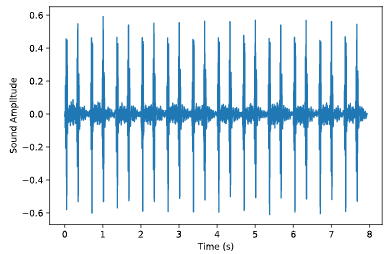

In [ ]:
#Example
# Read in the data
data = pd.read_csv('prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()
# <script.py> output:
#                       AAPL  FB       NFLX          V        XOM
#     time                                                       
#     2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
#     2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
#     2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
#     2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
#     2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997

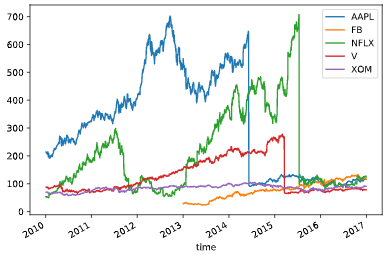

## Time Series as Inputs to a Model 

### Classifying a time series / Classification and feature engineering

Always visualize raw data before fitting models

Visualize your timeseries data!

In [ ]:
ixs = np.arange(audio.shape[-1])
time = ixs / sfreq #index/frequency of time series
fig, ax = plt.subplots()
ax.plot(time, audio)

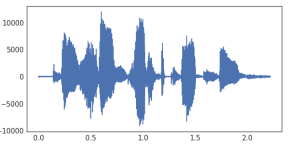

What features to use?
- Using raw timeseries data is too noisy for classication
- We need to calculate features!
- An easy start: summarize your audio data

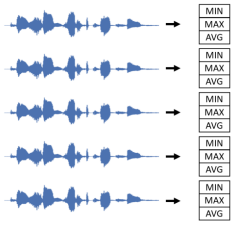
- min, max and avg can used as inputs of models

Calculating multiple features

In [ ]:
print(audio.shape)
# (n_files, time)
#output: (20, 7000)

means = np.mean(audio, axis=-1) #collapse across the last dimension (time)
maxs = np.max(audio, axis=-1)
stds = np.std(audio, axis=-1)

print(means.shape)
# (n_files,)

#output: (20,)

Fitting a classifier with scikit-learn
- We've just collapsed a 2-D dataset (samples x time) into several features of a 1-D dataset (samples)
- We can combine each feature, and use it as an input to a model
- If we have a label for each sample, we can use scikit-learn to create and t a classier

Preparing your features for scikit-learn

In [ ]:
# Import a linear classifier
from sklearn.svm import LinearSVC

# Note that means are reshaped to work with scikit-learn
X = np.column_stack([means, maxs, stds]) #1D array to two dimensions
y = labels.reshape([-1, 1]) #reshape for two dimensions
model = LinearSVC()
model.fit(X, y)

Scoring your scikit-learn model

In [ ]:
from sklearn.metrics import accuracy_score

# Different input data
predictions = model.predict(X_test)

# Score our model with % correct
# Manually
percent_score = sum(predictions == labels_test) / len(labels_test)
# Using a sklearn scorer
percent_score = accuracy_score(labels_test, predictions)

In [ ]:
#Example
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

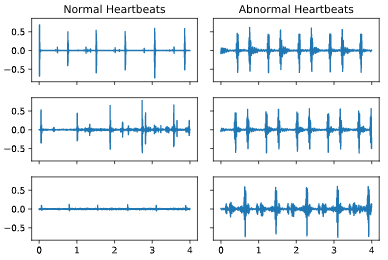

In [ ]:
#Example
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(normal.index, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(abnormal.index, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

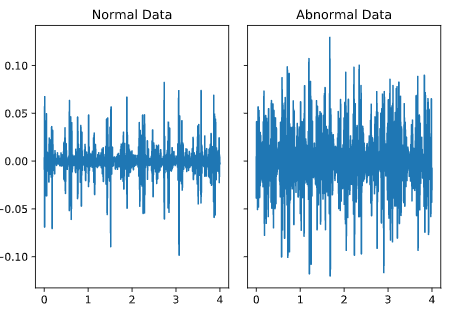

In [ ]:
#Example
from sklearn.svm import LinearSVC

# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))
# <script.py> output:
#     0.555555555556

### Improving features for classification 

The auditory envelope (general shape - amplitude and smooths)
- Smooth the data to calculate the auditory envelope
- Related to the total amount of audio energy present at each moment of time
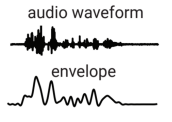

Smoothing over time (rolling window)
- Instead of averaging over all time, we can do a local average
- This is called smoothing your timeseries
- It removes short-term noise, while retaining the general paern

Smoothing your data
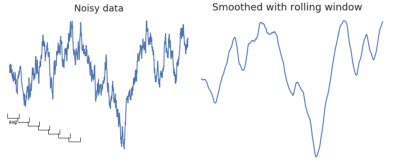

Calculating a rolling window statistic

In [ ]:
# Audio is a Pandas DataFrame
print(audio.shape)
# (n_times, n_audio_files)
# (5000, 20)

# Smooth our data by taking the rolling mean in a window of 50 samples
window_size = 50
windowed = audio.rolling(window=window_size) #how many time points to include. the larger, the smoother
audio_smooth = windowed.mean()

Calculating the auditory envelope
- First rectify your audio, then smooth it

In [ ]:
audio_rectified = audio.apply(np.abs)
audio_envelope = audio_rectified.rolling(50).mean()

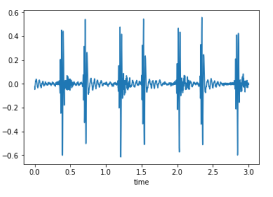
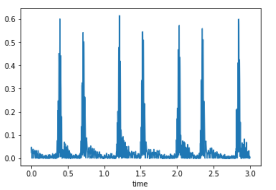
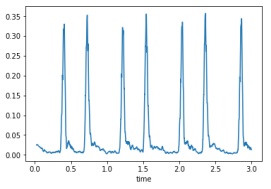

Feature engineering the envelope

In [ ]:
# Calculate several features of the envelope, one per sound
envelope_mean = np.mean(audio_envelope, axis=0)
envelope_std = np.std(audio_envelope, axis=0)
envelope_max = np.max(audio_envelope, axis=0)

# Create our training data for a classifier
X = np.column_stack([envelope_mean, envelope_std, envelope_max])

Preparing our features for scikit-learn

In [ ]:
X = np.column_stack([envelope_mean, envelope_std, envelope_max])
y = labels.reshape([-1, 1])

Cross validation for classification
- cross_val_score automates the process of:
- Spliing data into training / validation sets
- Filling the model on training data
- Scoring it on validation data
- Repeating this process

Using cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

model = LinearSVC()
scores = cross_val_score(model, X, y, cv=3)
print(scores)
# [0.60911642 0.59975305 0.61404035]

Auditory features: The Tempogram
- We can summarize more complex temporal information with timeseries-specic functions
- librosa is a great library for auditory and timeseries feature engineering
- Here we'll calculate the tempogram, which estimates the tempo of a sound over time
- We can calculate summary statistics of tempo in the same way that we can for theenvelope

Computing the tempogram

In [ ]:
# Import librosa and calculate the tempo of a 1-D sound array
import librosa as lr
audio_tempo = lr.beat.tempo(audio, sr=sfreq, #obtain the tempogram to extract feature
                            hop_length=2**6, aggregate=None)

In [ ]:
#Example
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

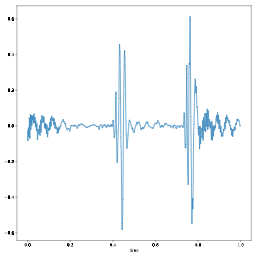

In [ ]:
#Example
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

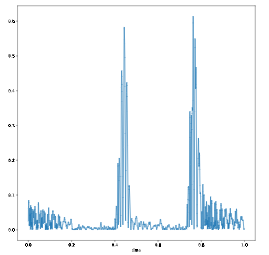

In [ ]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

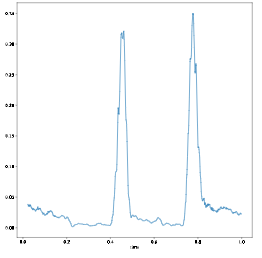

In [ ]:
#Example
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
print(X) #Me
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

In [ ]:
# <script.py> output:
#     [[ 0.04353008  0.07578418  0.35248821]
#      [ 0.04553973  0.0791786   0.35960806]
#      [ 0.05176417  0.07091632  0.40621971]
#      [ 0.00803776  0.03164058  0.24943082]
#      [ 0.01602636  0.03359184  0.28992118]
#      [ 0.05924991  0.07396314  0.52032055]
#      [ 0.00519226  0.00319128  0.0277168 ]
#      [ 0.02953012  0.05827377  0.3217972 ]
#      [ 0.04101763  0.0733102   0.36731579]
#      [ 0.05427804  0.07413921  0.35716804]
#      [ 0.00446486  0.00852908  0.03834081]
#      [ 0.00312972  0.00461101  0.03460813]
#      [ 0.00779525  0.01186303  0.13859426]
#      [ 0.05828067  0.08492477  0.35801228]
#      [ 0.05789107  0.07687476  0.36183574]
#      [ 0.03836938  0.05989346  0.26996217]
#      [ 0.00733513  0.01003482  0.07249809]
#      [ 0.0009587   0.00297103  0.0412318 ]
#      [ 0.00869117  0.00679164  0.04508755]
#      [ 0.04969265  0.0804132   0.36128269]
#      [ 0.00128295  0.0041209   0.03417803]
#      [ 0.0140563   0.01755791  0.11556826]
#      [ 0.01933001  0.03507407  0.17939707]
#      [ 0.06548801  0.09258776  0.44716162]
#      [ 0.00685793  0.00780096  0.0634609 ]
#      [ 0.01374334  0.01643459  0.12155181]
#      [ 0.00168918  0.00469773  0.03637446]
#      [ 0.00299758  0.00464594  0.02329937]
#      [ 0.0142429   0.01727787  0.13869272]
#      [ 0.03688358  0.06889274  0.35827821]
#      [ 0.00407022  0.00975748  0.04922746]
#      [ 0.02563171  0.04603735  0.26422961]
#      [ 0.0018326   0.00372465  0.01948485]
#      [ 0.00124721  0.00277674  0.01798531]
#      [ 0.04088449  0.03965533  0.22090677]
#      [ 0.01384189  0.02448468  0.22764168]
#      [ 0.05830874  0.06938113  0.40844402]
#      [ 0.04416311  0.0767876   0.36022628]
#      [ 0.01682764  0.03080363  0.19444591]
#      [ 0.00122269  0.00272168  0.02165299]
#      [ 0.01820436  0.02154413  0.11244557]
#      [ 0.0673602   0.07223675  0.41148773]
#      [ 0.00753291  0.00998298  0.07238273]
#      [ 0.00766106  0.03013048  0.22280851]
#      [ 0.03675919  0.06815149  0.3529018 ]
#      [ 0.0469868   0.07855918  0.35687109]
#      [ 0.07950674  0.08071161  0.48732442]
#      [ 0.03037102  0.05754939  0.40854636]
#      [ 0.0024377   0.00351598  0.02560532]
#      [ 0.01508713  0.01689354  0.09557459]
#      [ 0.08335246  0.05728218  0.33726584]
#      [ 0.02132238  0.04218739  0.26207528]
#      [ 0.03784088  0.04710566  0.32966906]
#      [ 0.01718835  0.01782527  0.13329974]
#      [ 0.03501877  0.03843854  0.31367514]
#      [ 0.03982823  0.04933426  0.22437602]
#      [ 0.09964255  0.11005431  0.44836947]
#      [ 0.00714682  0.01124386  0.05884965]
#      [ 0.07672997  0.08275399  0.36290682]
#      [ 0.04954006  0.08006467  0.36331815]]
#     0.716666666667

In [ ]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

In [ ]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
# <script.py> output:
#     0.533333333333

### The spectogram 

Fourier transforms
- Timeseries data can be described as a combination of quickly-changing things and slowlychanging things
- At each moment in time, we can describe the relative presence of fast- and slow-moving components
- The simplest way to do this is called a Fourier Transform
- This converts a single timeseries into an array that describes the timeseries as a combination of oscillations

A Fourier Transform (FFT)
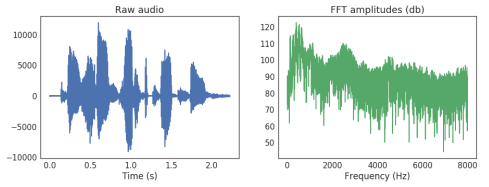

Spectrograms: combinations of windows Fourier transforms
- A spectrogram is a collection of windowed Fourier transforms over time
- Similar to how a rolling mean was calculated:
    - 1. Choose a window size and shape
    - 2. At a timepoint, calculate the FFT for that window
    - 3. Slide the window over by one
    - 4. Aggregate the results
- Called a Short-Time Fourier Transform (STFT)

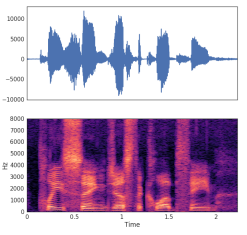

Calculating the STFT
- We can calculate the STFT with librosa
- There are several parameters we can tweak (such as window size)
- For our purposes, we'll convert into decibels which normalizes the average values of all frequencies
- We can then visualize it with the specshow() function

Calculating the STFT with code

In [ ]:
# Import the functions we'll use for the STFT
from librosa.core import stft, amplitude_to_db #stft is short time fourier transform
from librosa.display import specshow

# Calculate our STFT
HOP_LENGTH = 2**4
SIZE_WINDOW = 2**7
audio_spec = stft(audio, hop_length=HOP_LENGTH, n_fft=SIZE_WINDOW)

# Convert into decibels for visualization
spec_db = amplitude_to_db(audio_spec) #positive real numbers

# Visualize
specshow(spec_db, sr=sfreq, x_axis='time',
         y_axis='hz', hop_length=HOP_LENGTH)

Spectral feature engineering
- Each timeseries has a dierent spectral paern.
- We can calculate these spectral paerns by analyzing the spectrogram.
- For example, spectral bandwidth and spectral centroids describe where most of the energy is at each moment in time

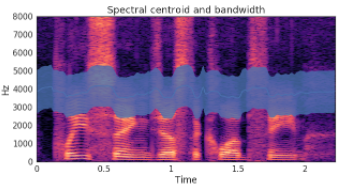

Calculating spectral features

In [ ]:
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

# Display these features on top of the spectrogram
ax = specshow(spec, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2,
                centroids + bandwidths / 2, alpha=0.5)

Combining spectral and temporal features in a
classifier

In [ ]:
centroids_all = []
bandwidths_all = []
for spec in spectrograms:
    bandwidths = lr.feature.spectral_bandwidth(S=lr.db_to_amplitude(spec))
    centroids = lr.feature.spectral_centroid(S=lr.db_to_amplitude(spec))

    # Calculate the mean spectral bandwidth
    bandwidths_all.append(np.mean(bandwidths))

    # Calculate the mean spectral centroid
    centroids_all.append(np.mean(centroids))

# Create our X matrix
X = np.column_stack([means, stds, maxs, tempo_mean,
                     tempo_max, tempo_std, bandwidths_all, centroids_all]) #input matrix

In [ ]:
#Example
# Import the stft function
from librosa.core import stft

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

In [ ]:
#Example
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

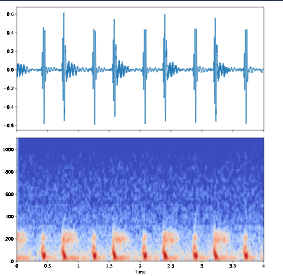

In [ ]:
#Example
import librosa as lr

# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

In [ ]:
#Example
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

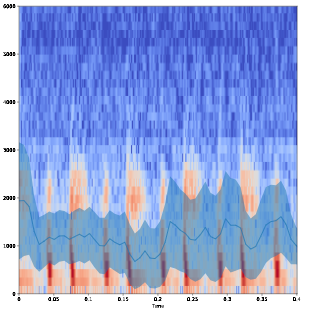

In [ ]:
#Example
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

#Example
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))
# <script.py> output:
#     0.483333333333

## Predicting Time Series Data 

### Predicting data over time 

Classification vs. Regression

CLASSIFICATION

In [ ]:
classification_model.predict(X_test)
# array([0, 1, 1, 0]) #categorical output

REGRESSION

In [ ]:
regression_model.predict(X_test)
# array([0.2, 1.4, 3.6, 0.6]) #continuous output

Correlation and regression
- Regression is similar to calculating correlation, with some key differences
    - Regression: A process that results in a formal model of the data
    - Correlation: A statistic that describes the data. Less information than regression model (easier to calculate and interpret)
- Correlation between variables often changes over time
    - Timeseries often have patterns that change over time
    - Two timeseries that seem correlated at one moment may not remain so over time

Visualizing relationships between timeseries

In [ ]:
fig, axs = plt.subplots(1, 2)

# Make a line plot for each timeseries
axs[0].plot(x, c='k', lw=3, alpha=.2)
axs[0].plot(y)
axs[0].set(xlabel='time', title='X values = time')

# Encode time as color in a scatterplot
axs[1].scatter(x_long, y_long, c=np.arange(len(x_long)), cmap='viridis')
axs[1].set(xlabel='x', ylabel='y', title='Color = time')

Visualizing two timeseries
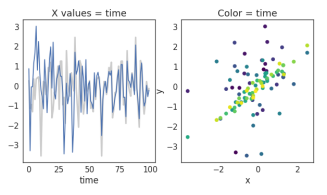

Regression models with scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.predict(X)

Visualize predictions with scikit-learn

In [ ]:
alphas = [.1, 1e2, 1e3]
ax.plot(y_test, color='k', alpha=.3, lw=3)
for ii, alpha in enumerate(alphas):
    y_predicted = Ridge(alpha=alpha).fit(X_train, y_train).predict(X_test)
    ax.plot(y_predicted, c=cmap(ii / len(alphas)))
ax.legend(['True values','Model 1','Model 2','Model 3'])
ax.set(xlabel="Time")

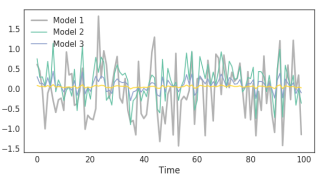

Scoring regression models
- Two most common methods:
    - Correlation (r)
    - Coefficient of Determination (R²)

Coefficient of Determination (R²)
- The value of R is bounded on the top by 1, and can be innitely low
- Values closer to 1 mean the model does a better job of predicting outputs
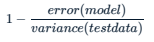

R² in scikit-learn

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_predicted, y_test))
# 0.08

In [ ]:
#Example
# Plot the raw values over time
prices.plot()
plt.show()

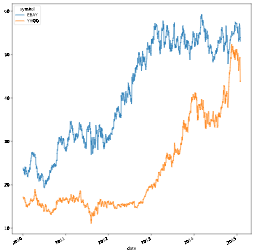

In [ ]:
# Scatterplot with one company per axis
prices.plot.scatter("EBAY", "YHOO")
plt.show()

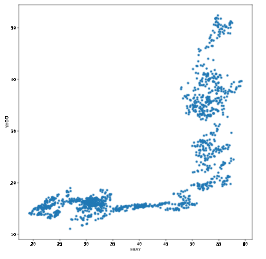

In [ ]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

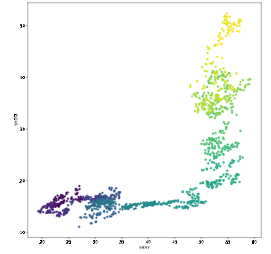

In [ ]:
#Example
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[["EBAY", "NVDA", "YHOO"]]
y = all_prices[["AAPL"]]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

# <script.py> output:
#     [-6.09050633 -0.3179172  -3.72957284]
#"Yes! As you can see, fitting a model with raw 
#data doesn't give great results."

In [ ]:
#Example
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)
# <script.py> output:
#     -5.70939901949

# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

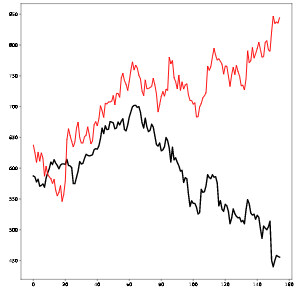

### Cleaning and improving your data

Data is messy
- Real-world data is often messy
- The two most common problems are missing data and outliers
- This often happens because of human error, machine sensor malfunction, database failures, etc
- Visualizing your raw data makes it easier to spot these problems

What messy data looks like
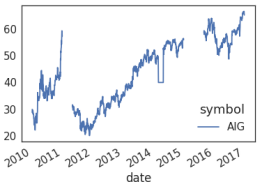

Interpolation: using time to fill in missing data
- A common way to deal with missing data is to interpolate missing values
- With timeseries data, you can use time to assist in interpolation.
- In this case, interpolation means using using the known values on either side of a gap in the data to make assumptions about what's missing.

Interpolation in Pandas

In [ ]:
# Return a boolean that notes where missing values are
missing = prices.isna()

# Interpolate linearly within missing windows
prices_interp = prices.interpolate('linear')

# Plot the interpolated data in red and the data w/ missing values in black
ax = prices_interp.plot(c='r')
prices.plot(c='k', ax=ax, lw=2)

Visualizing the interpolated data
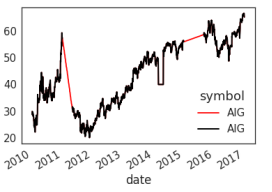

Using a rolling window to transform data
- Another common use of rolling windows is to transform the data
- We've already done this once, in order to smooth the data
- However, we can also use this to do more complex transformations

Transforming data to standardize variance
- A common transformation to apply to data is to standardize its mean and variance over time. There are many ways to do this.
- Here, we'll show how to convert your dataset so that each point represents the % change over a previous window.
- This makes timepoints more comparable to one another if the absolute values of data change a lot

Transforming to percent change with Pandas

In [ ]:
def percent_change(values):
    """Calculates the % change between the last value
    and the mean of previous values"""
    
    # Separate the last value and all previous values into variables
    previous_values = values[:-1] #pega todos até o último
    last_value = values[-1] #pega o último
    
    # Calculate the % difference between the last value
    # and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) \
    / np.mean(previous_values) #ultimo valor menos a media, dividido pela media
    return percent_change

Applying this to our data

In [ ]:
# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = prices.plot(ax=axs[0])

# Calculate % change and plot
ax = prices.rolling(window=20).aggregate(percent_change).plot(ax=axs[1])
ax.legend_.set_visible(False)

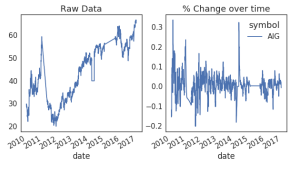

Finding outliers in your data
- Outliers are datapoints that are significantly statistically different from the dataset.
- They can have negative effects on the predictive power of your model, biasing it away from its "true" value
- One solution is to remove or replace outliers with a more representative value
- Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation

Plotting a threshold on our data

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for data, ax in zip([prices, prices_perc_change], axs):
    
    # Calculate the mean / standard deviation for the data
    this_mean = data.mean()
    this_std = data.std()

    # Plot the data, with a window that is 3 standard deviations
    # around the mean
    data.plot(ax=ax)
    ax.axhline(this_mean + this_std * 3, ls='--', c='r')
    ax.axhline(this_mean - this_std * 3, ls='--', c='r')

Visualizing outlier thresholds
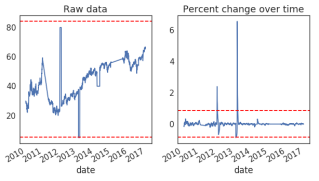
- outlier aparece na transformação do dado

Replacing outliers using the threshold

In [ ]:
# Center the data so the mean is 0
prices_outlier_centered = prices_outlier_perc - prices_outlier_perc.mean()

# Calculate standard deviation
std = prices_outlier_perc.std()

# Use the absolute value of each datapoint
# to make it easier to find outliers
outliers = np.abs(prices_outlier_centered) > (std * 3)

# Replace outliers with the median value
# We'll use np.nanmean since there may be nans around the outliers
prices_outlier_fixed = prices_outlier_centered.copy()
prices_outlier_fixed[outliers] = np.nanmedian(prices_outlier_fixed)
#substitui com a mediana sem os missing values

Visualize the results

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
prices_outlier_centered.plot(ax=axs[0])
prices_outlier_fixed.plot(ax=axs[1])

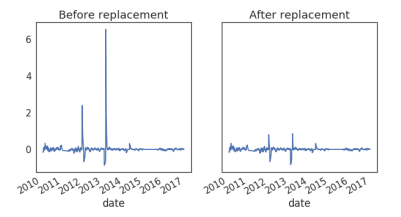

In [ ]:
#Example
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

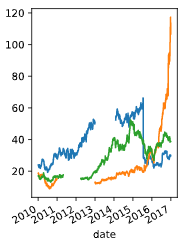

In [ ]:
#Example
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

In [ ]:
#Example
# Interpolate using the latest non-missing value
interpolation_type = "zero"
interpolate_and_plot(prices, interpolation_type)

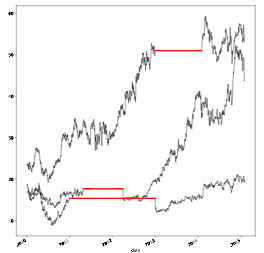

In [ ]:
# Interpolate linearly
interpolation_type = "linear"
interpolate_and_plot(prices, interpolation_type)

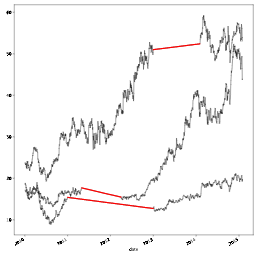

In [ ]:
# Interpolate with a quadratic function
interpolation_type = "quadratic"
interpolate_and_plot(prices, interpolation_type)

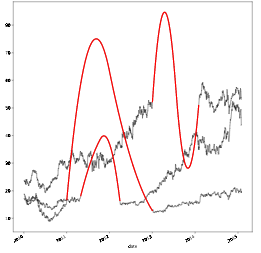

In [ ]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

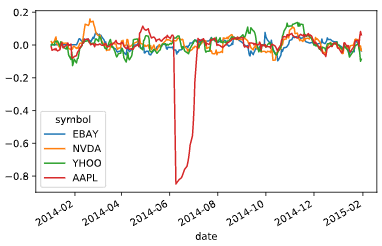

In [ ]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

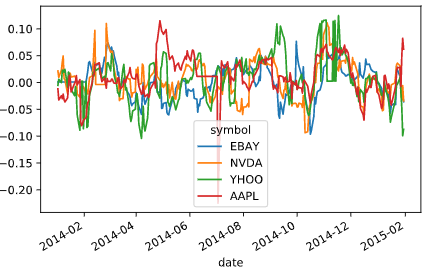

### Creating features over time 

Extracting features with window
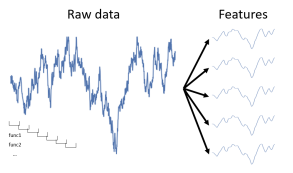

Using .aggregate for feature extraction

In [ ]:
# Visualize the raw data
print(prices.head(3))

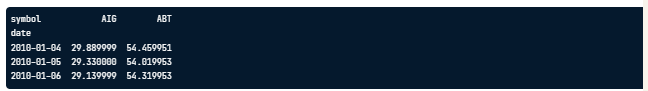

In [ ]:
# Calculate a rolling window, then extract two features
feats = prices.rolling(20).aggregate([np.std, np.max]).dropna()
print(feats.head(3))

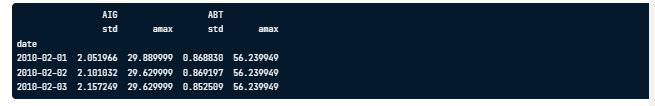

Check the properties of your features!
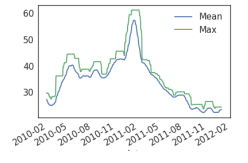

Using partial() in Python

In [ ]:
# If we just take the mean, it returns a single value
a = np.array([[0, 1, 2], [0, 1, 2], [0, 1, 2]])
print(np.mean(a))
# 1.0

# We can use the partial function to initialize np.mean
# with an axis parameter
from functools import partial
mean_over_first_axis = partial(np.mean, axis=0)

print(mean_over_first_axis(a))
# [0. 1. 2.]

Percentiles summarize your data
- Percentiles are a useful way to get more ne-grained summaries of your data (as opposed to using np.mean )
- For a given dataset, the Nth percentile is the value where N% of the data is below that datapoint, and 100-N% of the data is above that datapoint.

In [ ]:
print(np.percentile(np.linspace(0, 200), q=20))
# 40.0

Combining np.percentile() with partial functions to calculate a range of percentiles

In [ ]:
data = np.linspace(0, 100)

# Create a list of functions using a list comprehension
percentile_funcs = [partial(np.percentile, q=ii) for ii in [20, 40, 60]]

# Calculate the output of each function in the same way
percentiles = [i_func(data) for i_func in percentile_funcs]
print(percentiles)
# [20.0, 40.00000000000001, 60.0]

# Calculate multiple percentiles of a rolling window
data.rolling(20).aggregate(percentiles)

Calculating "date-based" features
- Thus far we've focused on calculating "statistical" features - these are features that correspond statistical properties of the data, like "mean","standard deviation", etc
- However, don't forget that timeseries data oen has more "human" features associated with it, like days of the week, holidays, etc.
- These features are oen useful when dealing with timeseries data that spans multiple years (such as stock value over time)

datetime features using Pandas

In [ ]:
# Ensure our index is datetime
prices.index = pd.to_datetime(prices.index)

# Extract datetime features
day_of_week_num = prices.index.weekday
print(day_of_week_num[:10])
# Index([0 1 2 3 4 0 1 2 3 4], dtype='object')

day_of_week = prices.index.weekday_name
print(day_of_week[:10])
# Index(['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday' 'Tuesday'
#        'Wednesday' 'Thursday' 'Friday'], dtype='object')

In [ ]:
#Example
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

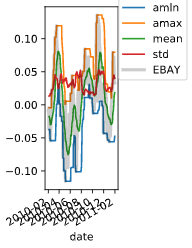

In [ ]:
#Example
# Import partial from functools
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

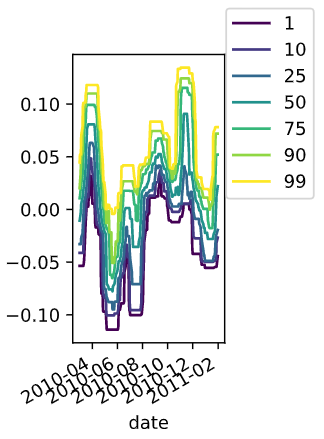

In [ ]:
#Example
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.weekday
prices_perc['week_of_year'] = prices_perc.index.week
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)

# <script.py> output:
#                     EBAY  day_of_week  week_of_year  month_of_year
#     date                                                          
#     2014-01-02  0.017938            3             1              1
#     2014-01-03  0.002268            4             1              1
#     2014-01-06 -0.027365            0             2              1
#     2014-01-07 -0.006665            1             2              1
#     2014-01-08 -0.017206            2             2              1           12
#     [504 rows x 4 columns]

## Validating and Inspecting Time Series Models 

### Time-delayed features and autoregressive models

The past is useful
- Timeseries data almost always have information that is shared between timepoints
- Information in the past can help predict what happens in the future
- Often the features best-suited to predict a timeseries are previous values of the same timeseries.

A note on smoothness and auto-correlation
- A common question to ask of a timeseries: how smooth is the data.
- AKA, how correlated is a timepoint with its neighboring timepoints (called autocorrelation).
- The amount of auto-correlation in data will impact your models.

Creating time-lagged features
- Let's see how we could build a model that uses values in the past as input features.
- We can use this to assess how auto-correlated our signal is (and lots of other stu too)

Time-shifting data with Pandas

In [ ]:
print(df)
#    df
# 0 0.0
# 1 1.0
# 2 2.0
# 3 3.0
# 4 4.0

# Shift a DataFrame/Series by 3 index values towards the past
print(df.shift(3))
#    df
# 0 NaN
# 1 NaN
# 2 NaN
# 3 0.0
# 4 1.0

In [15]:
#test
import pandas as pd
pd.Series(range(1,11)).shift(8)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    1.0
9    2.0
dtype: float64

Creating a time-shifted DataFrame

In [ ]:
# data is a pandas Series containing time series data
data = pd.Series(...)

# Shifts
shifts = [0, 1, 2, 3, 4, 5, 6, 7]

# Create a dictionary of time-shifted data
many_shifts = {'lag_{}'.format(ii): data.shift(ii) for ii in shifts}

# Convert them into a dataframe
many_shifts = pd.DataFrame(many_shifts)

Fitting a model with time-shifted features

In [ ]:
# Fit the model using these input features
model = Ridge()
model.fit(many_shifts, data)

Interpreting the auto-regressive model coefficients

In [ ]:
# Visualize the fit model coefficients
fig, ax = plt.subplots()
ax.bar(many_shifts.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

# Set formatting so it looks nice
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

Visualizing coefficients for a rough signal
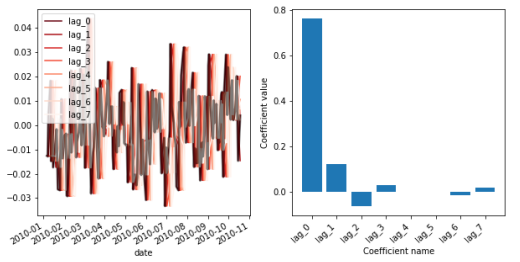

Visualizing coefficients for a smooth signal
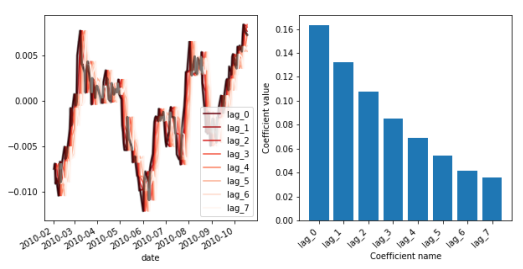

In [ ]:
#Example
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc.shift(day_shift) for day_shift in shifts}

# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

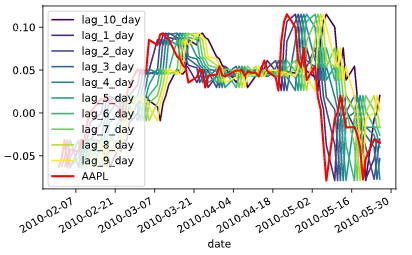

In [ ]:
#Example
# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

# Fit the model
model = Ridge()
model.fit(X, y)

In [ ]:
#Example
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

In [ ]:
#Example
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.show()

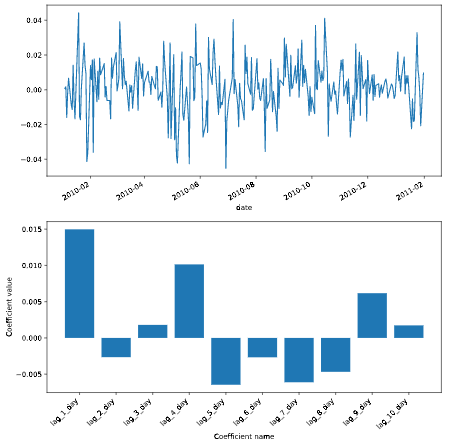

In [ ]:
#Example
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.show()

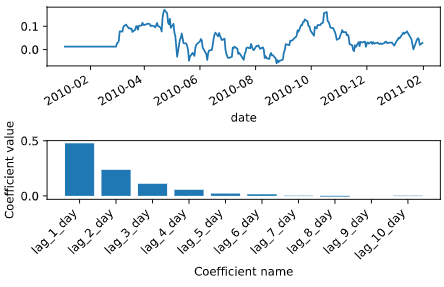

### Cross-validating time series data 

Cross validation with scikit-learn

In [ ]:
# Iterating over the "split" method yields train/test indices
for tr, tt in cv.split(X, y):
    model.fit(X[tr], y[tr])
    model.score(X[tt], y[tt])

Cross validation types: KFold
- KFold cross-validation splits your data into multiple "folds" of equal size
- It is one of the most common cross-validation routines

In [ ]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5)
for tr, tt in cv.split(X, y):
    ...

Visualizing model predictions

In [ ]:
fig, axs = plt.subplots(2, 1)

# Plot the indices chosen for validation on each loop
axs[0].scatter(tt, [0] * len(tt), marker='_', s=2, lw=40)
axs[0].set(ylim=[-.1, .1], title='Test set indices (color=CV loop)',
           xlabel='Index of raw data')

# Plot the model predictions on each iteration
axs[1].plot(model.predict(X[tt]))
axs[1].set(title='Test set predictions on each CV loop',
           xlabel='Prediction index')

Visualizing KFold CV behavior
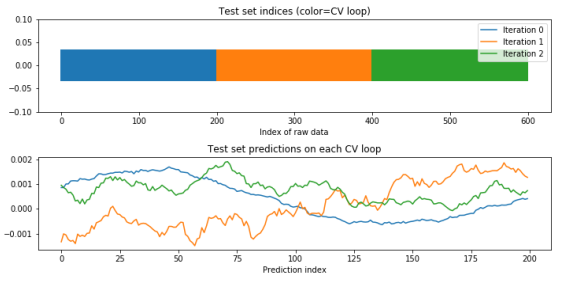

A note on shuffling your data
- Many CV iterators let you shuffle data as a part of the cross-validation process.
- This only works if the data is i.i.d., which timeseries usually is not.
- You should not shuffle your data when making predictions with timeseries.

In [ ]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=3)
for tr, tt in cv.split(X, y):
    ...

Visualizing shuffled CV behavior
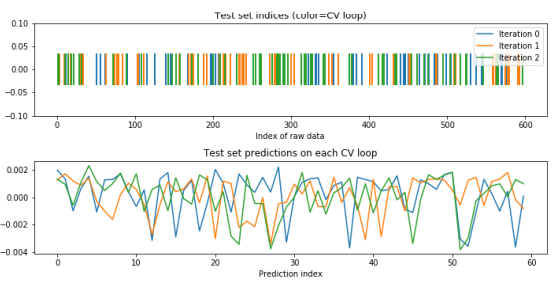

Using the time series CV iterator
- Thus far, we've broken the linear passage of time in the cross validation
- However, you generally should not use datapoints in the future to predict data in the past
- One approach: Always use training data from the past to predict the future

Visualizing time series cross validation iterators

In [ ]:
# Import and initialize the cross-validation iterator
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=10)

fig, ax = plt.subplots(figsize=(10, 5))
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
                    marker='_', lw=6)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
                    marker='_', lw=6)
    ax.set(ylim=[10,-1], title='TimeSeriesSplit behavior',
           xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training','Validation'])

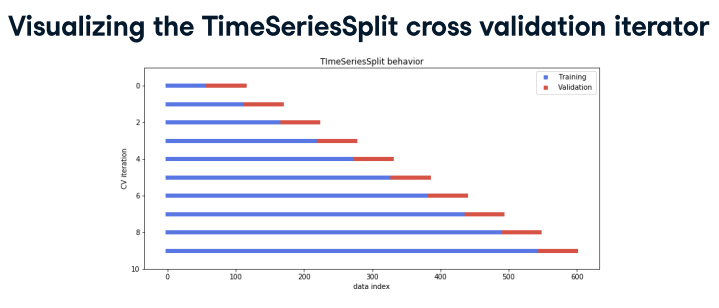

- Training comes before future, so it is used to predict the future

Custom scoring functions in scikit-learn

In [ ]:
def myfunction(estimator, X, y):
    y_pred = estimator.predict(X)
    my_custom_score = my_custom_function(y_pred, y)
    
    return my_custom_score

A custom correlation function for scikit-learn

In [ ]:
def my_pearsonr(est, X, y):
    # Generate predictions and convert to a vector
    y_pred = est.predict(X).squeeze()
    
    # Use the numpy "corrcoef" function to calculate a correlation matrix
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    
    # Return a single correlation value from the matrix
    my_corrcoef = my_corrcoef[1, 0]
    
    return my_corrcoef

In [ ]:
#Example
# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt],prediction)
    results.append((prediction, score, tt))

# Custom function to quickly visualize predictions
visualize_predictions(results)

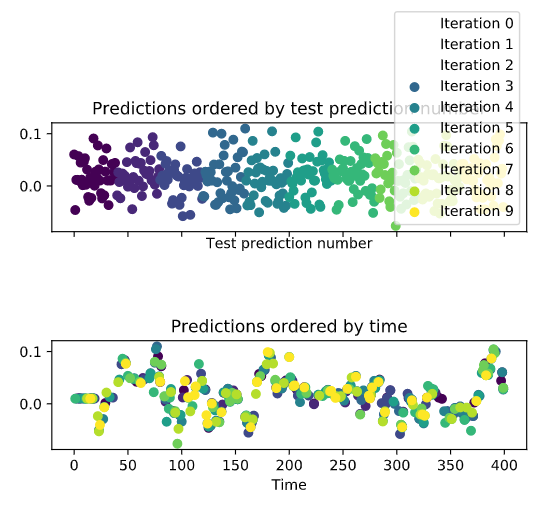

In [ ]:
#Example
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr],y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, tt))
    
# Custom function to quickly visualize predictions
visualize_predictions(results)

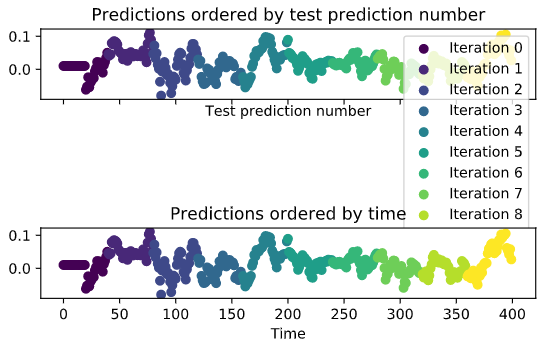

In [ ]:
#Example
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits = 10)

# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

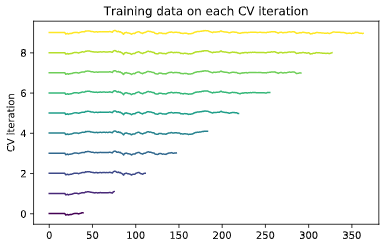

### Stationarity and stability 

Stationarity
- Stationary time series do not change their statistical properties over time
- E.g., mean, standard deviation, trends
- Most time series are non-stationary to some extent

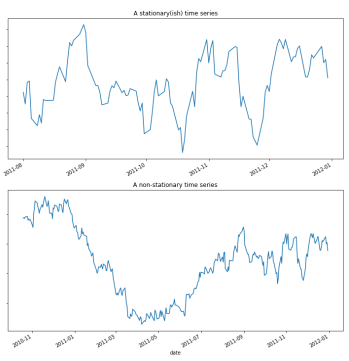

Model stability
- Non-stationary data results in variability in our model
- The statistical properties the model nds may change with the data
- In addition, we will be less certain about the correct values of model parameters
- How can we quantify this?

Cross validation to quantify parameter stability
- One approach: use cross-validation
- Calculate model parameters on each iteration
- Assess parameter stability across all CV splits

Bootstrapping the mean
- Bootstrapping is a common way to assess variability
- The bootstrap:
    - 1. Take a random sample of data with replacement
    - 2. Calculate the mean of the sample
    - 3. Repeat this process many times (1000s)
    - 4. Calculate the percentiles of the result (usually 2.5, 97.5)

The result is a 95% confidence interval of the mean of each coefficient.

Bootstrapping the mean

In [ ]:
from sklearn.utils import resample

# cv_coefficients has shape (n_cv_folds, n_coefficients)
n_boots = 100
bootstrap_means = np.zeros(n_boots, n_coefficients)
for ii in range(n_boots):
    # Generate random indices for our data with replacement,
    # then take the sample mean
    random_sample = resample(cv_coefficients)
    bootstrap_means[ii] = random_sample.mean(axis=0)
    
# Compute the percentiles of choice for the bootstrapped means
percentiles = np.percentile(bootstrap_means, (2.5, 97.5), axis=0)

Plotting the bootstrapped coefficients

In [ ]:
fig, ax = plt.subplots()
ax.scatter(many_shifts.columns, percentiles[0], marker='_', s=200)
ax.scatter(many_shifts.columns, percentiles[1], marker='_', s=200)
#plotting the interval

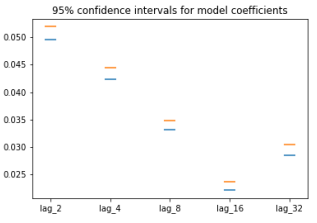

Assessing model performance stability
- If using the TimeSeriesSplit, can plot the model's score over time.
- This is useful in nding certain regions of time that hurt the score
- Also useful to nd non-stationary signals

Model performance over time

In [ ]:
def my_corrcoef(est, X, y):
    """Return the correlation coefficient
    between model predictions and a validation set.
    """
    return np.corrcoef(y, est.predict(X))[1, 0]

# Grab the date of the first index of each validation set
first_indices = [data.index[tt[0]] for tr, tt in cv.split(X, y)]

# Calculate the CV scores and convert to a Pandas Series
cv_scores = cross_val_
score(model, X, y, cv=cv, scoring=my_corrcoef)
cv_scores = pd.Series(cv_scores, index=first_indices)

Visualizing model scores as a timeseries

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

# Calculate a rolling mean of scores over time
cv_scores_mean = cv_scores.rolling(10, min_periods=1).mean()
cv_scores.plot(ax=axs[0])
axs[0].set(title='Validation scores (correlation)', ylim=[0, 1])

# Plot the raw data
data.plot(ax=axs[1])
axs[1].set(title='Validation data')

Visualizing model scores
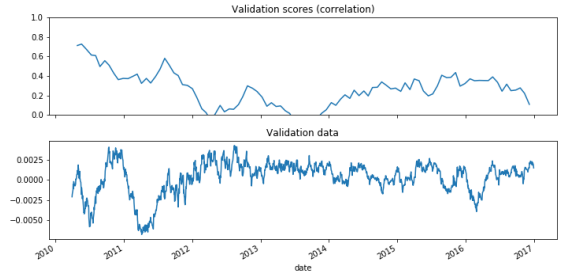

Fixed windows with time series cross-validation

In [ ]:
# Only keep the last 100 datapoints in the training data
window = 100

# Initialize the CV with this window size
cv = TimeSeriesSplit(n_splits=10, max_train_size=window)

Non-stationary signals
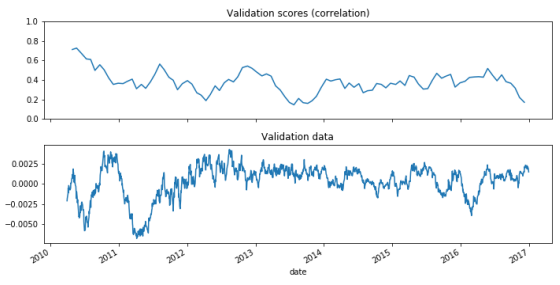

### Wrap-up 

Timeseries and machine learning
- The many applications of time series + machine learning
- Always visualize your data first
- The scikit-learn API standardizes this process

Feature extraction and classification
- Summary statistics for time series classication
- Combining multiple features into a single input matrix
- Feature extraction for time series data

Model fitting and improving data quality
- Time series features for regression
- Generating predictions over time
- Cleaning and improving time series data

Validating and assessing our model performance
- Cross-validation with time series data (don't shue the data!)
- Time series stationarity
- Assessing model coecient and score stability

Advanced concepts in time series
- Advanced window functions
- Signal processing and ltering details
- Spectral analysis

Advanced machine learning
- Advanced time series feature extraction (e.g., tsfresh )
- More complex model architectures for regression and classication
- Production-ready pipelines for time series analysis

Ways to practice
- There are a lot of opportunities to practice your skills with time series data.
- Kaggle has a number of time series predictions challenges
- Quantopian is also useful for learning and using predictive models others have built.